In [10]:
#General imports
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [4]:
loans = pd.read_csv('loan.csv')
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [7]:
for column in loans.columns:
    print column

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [9]:
len(loans)

887379

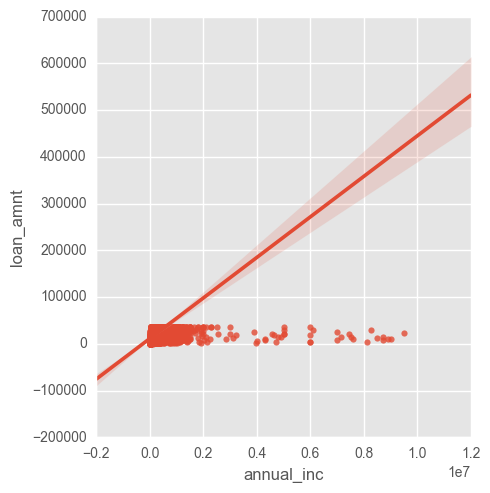

In [12]:
sns.lmplot(data=loans,
           x='annual_inc', y='loan_amnt');
#           col='loan_status', hue='loan_status');

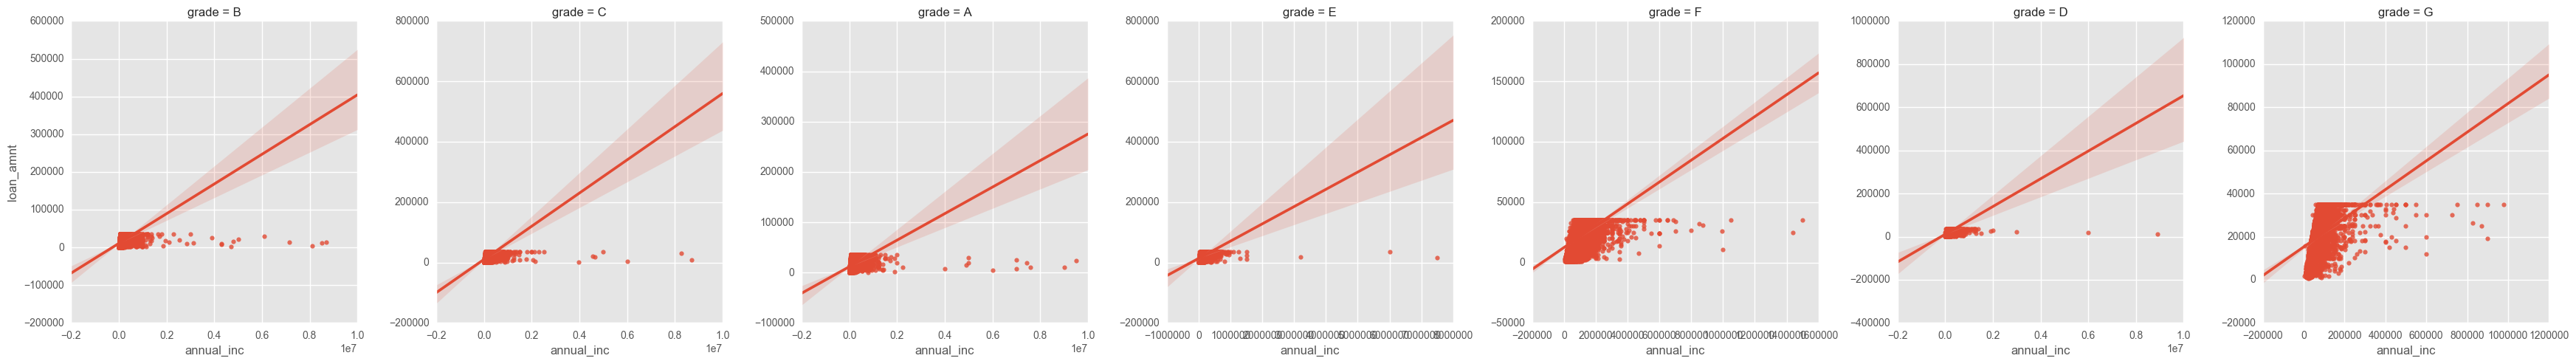

In [14]:
lm = sns.lmplot(data=loans, x='annual_inc', y='loan_amnt', col='grade', sharex=False, sharey=False);

In [15]:
axes = lm.axes

In [18]:
axes[0,0].set_ylim(0,50000)

(0, 50000)

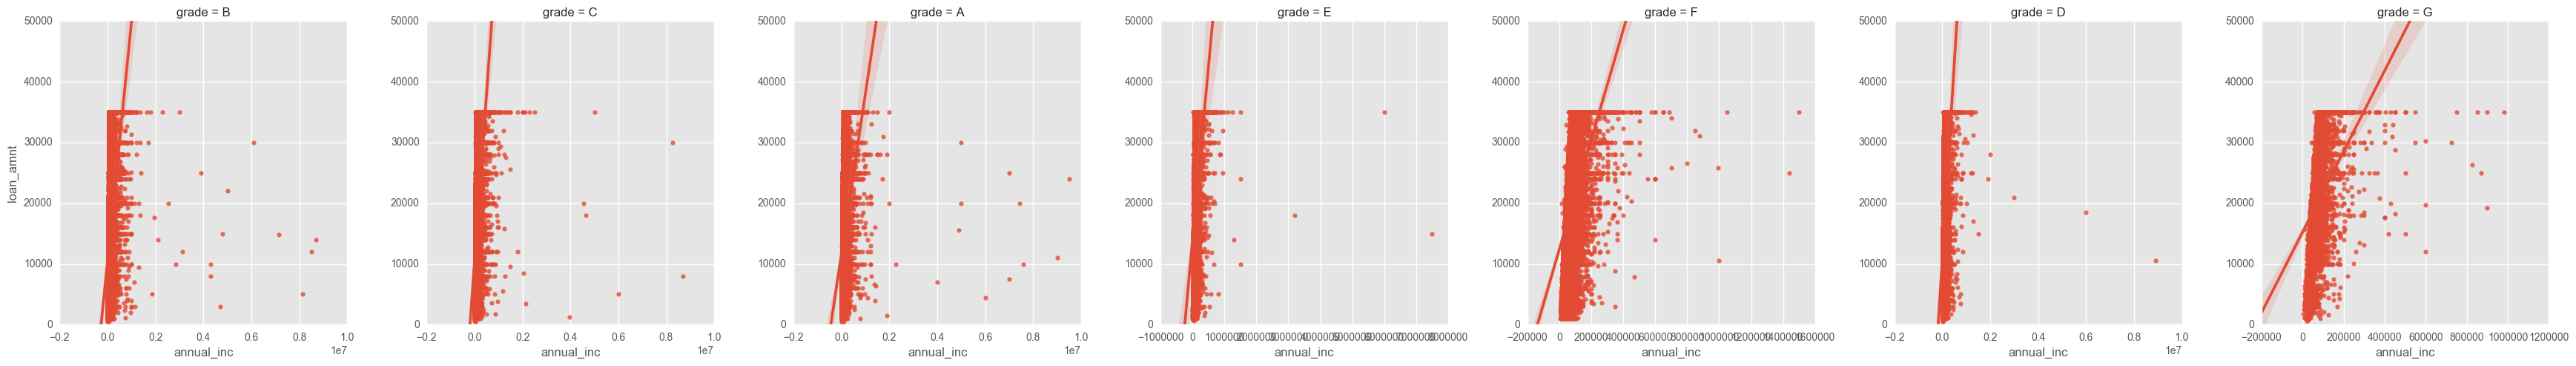

In [25]:
g = sns.lmplot(data=loans, x='annual_inc', y='loan_amnt', col='grade', sharex=False, sharey=False)
g.set(ylim=(0,50000))

In [55]:
loans.groupby(['addr_state', 'purpose']).loan_status.value_counts()

addr_state  purpose             loan_status                                        
AK          car                 Current                                                  8
                                Fully Paid                                               7
            credit_card         Current                                                334
                                Fully Paid                                             114
                                Charged Off                                             21
                                Late (31-120 days)                                       5
                                Issued                                                   3
                                In Grace Period                                          1
                                Late (16-30 days)                                        1
            debt_consolidation  Current                                                902
      

In [44]:
loans[(loans.annual_inc > 100000)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
17,1069971,1304884,3600.0,3600.0,3600.0,36 months,6.03,109.57,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1039153,1269083,21000.0,21000.0,21000.0,36 months,12.42,701.73,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1069799,1304678,4000.0,4000.0,4000.0,36 months,11.71,132.31,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,1068120,1302485,25600.0,25600.0,25350.0,36 months,9.91,824.96,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,1068893,1303514,14400.0,14400.0,14400.0,36 months,8.90,457.25,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
loans[(loans.annual_inc > 100000)].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,1.577630e+05,1.577630e+05,157763.000000,157763.000000,157763.000000,157763.000000,157763.000000,1.577630e+05,157763.000000,157758.000000,...,4297.000000,3857.000000,4297.000000,4297.000000,4297.000000,4297.000000,1.477410e+05,4297.000000,4297.000000,4297.000000
mean,3.424361e+07,3.688947e+07,21240.057713,21219.603773,21171.728870,12.474755,620.763441,1.510846e+05,14.864534,0.401526,...,55583.549220,69.354291,1.349313,2.896439,9256.814754,61.374331,5.296623e+04,1.098906,1.826856,2.354666
std,2.271021e+07,2.397661e+07,9340.398912,9340.966678,9368.702008,4.559982,284.974293,1.204870e+05,7.379349,0.972846,...,56232.700119,21.861541,1.577947,2.766558,7457.375196,18.958448,6.943187e+04,1.555384,3.035144,3.096203
min,5.641300e+04,7.047300e+04,925.000000,925.000000,0.000000,5.320000,25.280000,1.000001e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,1.128534e+07,1.296720e+07,14000.000000,14000.000000,14000.000000,8.390000,392.810000,1.124510e+05,9.420000,0.000000,...,19515.000000,57.300000,0.000000,1.000000,4097.000000,49.800000,2.320000e+04,0.000000,0.000000,1.000000
50%,3.828245e+07,4.106505e+07,21000.000000,21000.000000,21000.000000,12.210000,607.620000,1.282000e+05,14.060000,0.000000,...,41223.000000,72.200000,1.000000,2.000000,7473.000000,62.600000,3.990000e+04,1.000000,1.000000,2.000000
75%,5.594840e+07,5.960966e+07,28800.000000,28800.000000,28737.500000,15.410000,814.650000,1.580020e+05,19.540000,0.000000,...,72467.000000,84.400000,2.000000,4.000000,12721.000000,75.000000,6.440000e+04,2.000000,3.000000,4.000000
max,6.861682e+07,7.351965e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,39.990000,30.000000,...,554184.000000,191.800000,22.000000,43.000000,127305.000000,128.300000,9.999999e+06,15.000000,35.000000,32.000000


In [50]:
loans[(loans.annual_inc < 50000)].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.605600e+05,2.605600e+05,260560.000000,260560.000000,260560.000000,260560.000000,260560.000000,260560.000000,260560.000000,260548.000000,...,5669.000000,4621.000000,5669.000000,5669.000000,5669.000000,5669.000000,2.349170e+05,5669.000000,5669.000000,5669.000000
mean,3.135296e+07,3.381245e+07,9496.966917,9489.448687,9454.479488,13.799559,294.323994,36683.493380,20.004460,0.233201,...,22255.628682,74.079225,1.358970,2.941965,3718.870171,60.016564,2.003766e+04,0.760275,1.056095,1.561827
std,2.286668e+07,2.417107e+07,4763.762746,4756.802337,4769.412820,4.112462,138.475386,8562.732303,29.091206,0.739790,...,29806.497898,24.422880,1.435541,2.530962,2975.579713,21.547015,1.569906e+04,1.308542,2.108062,2.671552
min,5.552100e+04,7.062600e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8.116226e+06,9.420485e+06,6000.000000,6000.000000,5850.000000,10.990000,191.280000,30671.490000,13.470000,0.000000,...,3684.000000,61.000000,0.000000,1.000000,1720.000000,45.200000,1.030000e+04,0.000000,0.000000,0.000000
50%,3.212853e+07,3.473164e+07,9175.000000,9175.000000,9100.000000,13.490000,282.520000,38000.000000,19.890000,0.000000,...,14382.000000,78.800000,1.000000,2.000000,3020.000000,60.900000,1.630000e+04,0.000000,0.000000,1.000000
75%,5.313120e+07,5.662152e+07,12000.000000,12000.000000,12000.000000,16.550000,375.430000,44000.000000,26.270000,0.000000,...,28279.000000,91.100000,2.000000,4.000000,4915.000000,76.000000,2.520000e+04,1.000000,1.000000,3.000000
max,6.861703e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1262.880000,49999.920000,9999.000000,39.000000,...,466093.000000,179.200000,12.000000,22.000000,29967.000000,151.400000,1.013700e+06,14.000000,29.000000,20.000000


In [59]:
loans[(loans.annual_inc > 100000)].groupby(['purpose']).loan_amnt.mean()

purpose
car                   12635.087719
credit_card           22160.218725
debt_consolidation    22065.488540
educational           11866.666667
home_improvement      19492.106880
house                 21519.776119
major_purchase        17207.914201
medical               13581.530537
moving                13634.715347
other                 15929.866122
renewable_energy      15878.092784
small_business        21396.712204
vacation               9446.705426
wedding               14908.333333
Name: loan_amnt, dtype: float64

In [61]:
loans[(loans.annual_inc < 50000)].groupby(['purpose']).loan_amnt.mean()

purpose
car                    6757.362869
credit_card            9932.443025
debt_consolidation    10004.081048
educational            5012.204724
home_improvement       8812.065064
house                  9362.561335
major_purchase         7501.422610
medical                6424.761824
moving                 5401.182894
other                  6702.098450
renewable_energy       6569.756098
small_business         9008.068182
vacation               4926.234568
wedding                7473.288973
Name: loan_amnt, dtype: float64